# Machine Learning: AllLife Bank Personal Loan Campaign

In [47]:
!pip install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  error in nb_black setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after name and no valid version specifier)
      yapf >= '0.28'; python_version < '3.6'
           ^
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [45]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries to build logistic regression model
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# pip install uszipcode (added while processing the data)
from uszipcode import SearchEngine, SimpleZipcode

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")



## Loading the dataset

In [3]:
# Importing the dataset and then making a copy to avoid corrupting the data
LoanModelling = pd.read_csv("Loan_Modelling.csv")
data = LoanModelling.copy()

## Data Overview

* Observations
* Sanity checks

In [4]:
# Using the print and data.shape functions to get feedback on the size of the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [5]:
# Using the dataframe.head function with an input of 10 to look at the first 10 rows of the data
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
# Using the dataframe.tail function with an input of 10 to look at the last 10 rows of the data
data.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [7]:
# Using the dataframe.info function to look at datatypes and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Using the dataframe.describe function to get the basic mathematical properties of the dataset and using .T to transpose the
# rows and columns to view it easier
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The ID is a redundant index and will be removed.
* Personal_Loan is the target variable.
* The ZIPCode column will have to be made into categories either city, county, or state.
* All of the columns are of numerical types int64 and float64
* There is at least 1 negative value in the Experience column which does not seem right. 


In [9]:
# Checking the conversion rate statistic of over 9% success.
data["Personal_Loan"].value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [10]:
print(f"The success rate of the last loan campaign was {480/5000*100}%.")

The success rate of the last loan campaign was 9.6%.


In [11]:
# Using a summation of the dataframe.duplicated() function to check for duplicated rows.
data.duplicated().sum()

0

In [12]:
# Using the dataframe.isnull() to check for missing values, using the .sum() function to make a count in each column and sorting
# the columns by highest number of null values to lowest.
data.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
print(F"There are {data.duplicated().sum()} duplicated values and {data.isnull().sum().sum()} missing values.")

There are 0 duplicated values and 0 missing values.


In [14]:
print(F"There are {(data['Experience'] < 0).sum()} negative values in the Experience column, the eqivalent of {((data['Experience'] < 0).sum())/5000*100}% of the dataset.")

There are 52 negative values in the Experience column, the eqivalent of 1.04% of the dataset.


* There are no duplicated or missing values to deal with, but the 52 negative numbers in the Experience column that will need to be dealt with in Preprocessing either by being dropped or by using the absolute value as these may be data entry errors as negative years of experience don't make any sense.
  

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

* Creating a function for help with data visualization.

In [15]:
# function to plot a boxplot and a histogram along the same scale for a single column.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Oranges"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Question 1: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

In [16]:
data["Mortgage"].describe().T

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [17]:
print(F"There are {(data['Mortgage'] > 0).sum()} people who have a mortgage or {((data['Mortgage'] > 0).sum())/5000*100}% of total customers own their home.")

There are 1538 people who have a mortgage or 30.759999999999998% of total customers own their home.


In [18]:
print(F"There are {(data['Mortgage'] > 101.713802*2).sum()} people who have a mortgage more then two standard deviations above mean or {((data['Mortgage'] > 101.713802*2).sum())/5000*100}% of total customers.")

There are 490 people who have a mortgage more then two standard deviations above mean or 9.8% of total customers.


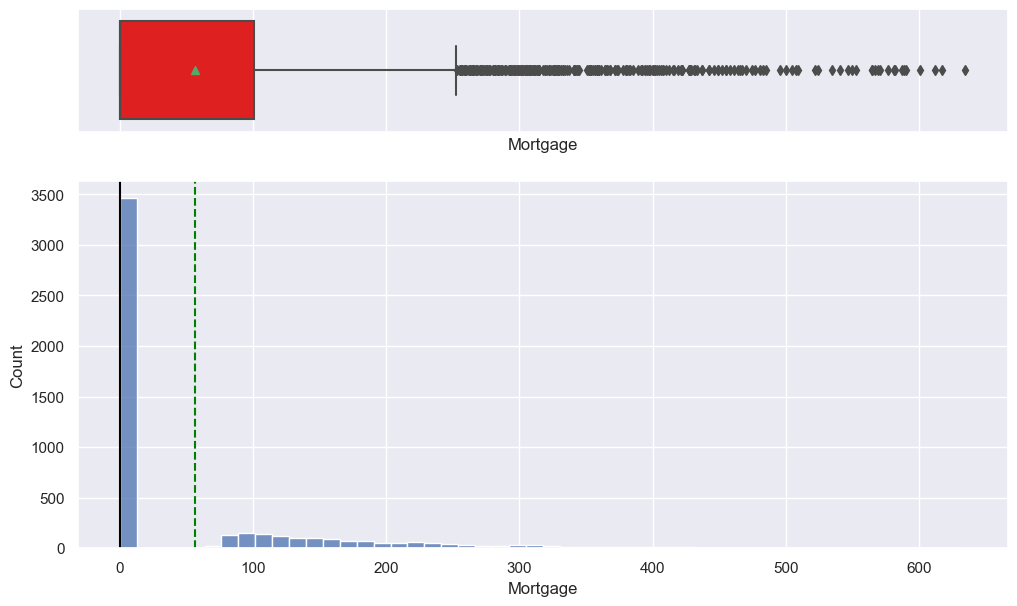

In [19]:
histogram_boxplot(data, "Mortgage", bins=50)

* The implication here is that ~70% of customers don't have a mortgage. The majority of this number likely rent, live with their parents, or outright own their home. This skews the data. We don't have enough information to break the data into multiple catagories such as renter, mortgage, owner, etc. We do have enough information to say there are catagories of no mortgage, mortgage, and high mortgage (more than 2 standard deviations above the mean).

### Question 2: How many customers have credit cards?

* In the description the CreditCard column shows a 0 for no CC and a 1 for yes (or has a CC). 

In [20]:
print(F"There are {(data['CreditCard'] == 1).sum()} people who have a credit card or {((data['CreditCard'] == 1).sum())/5000*100}% of the total customers have a credit card.")

There are 1470 people who have a credit card or 29.4% of the total customers have a credit card.


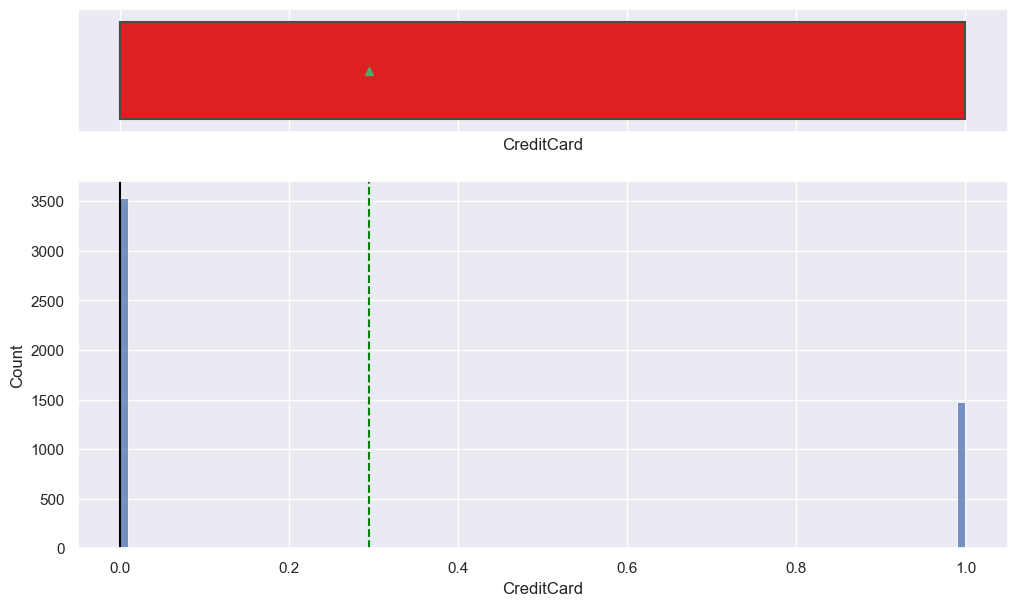

In [21]:
histogram_boxplot(data, "CreditCard", bins=100)

### Question 3: What are the attributes that have a strong correlation with the target attribute (personal loan)?

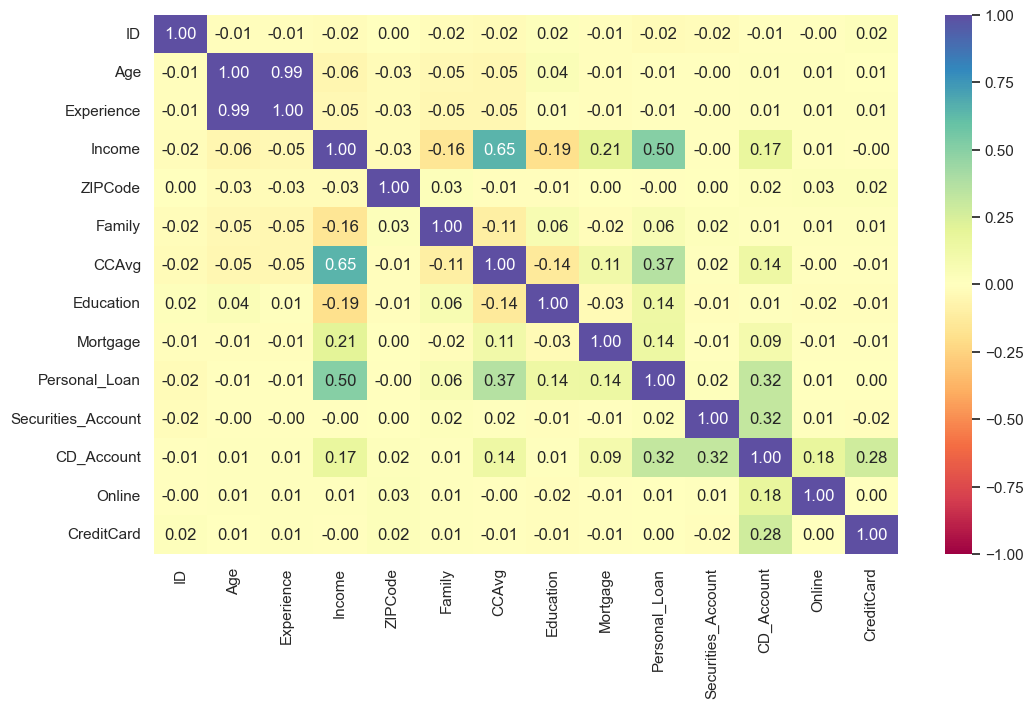

In [22]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The heatmap shows Personal_Loan has the highest correlation with Income(0.50), CCAvg(0.37), and CD_Account(0.32).

### Question 4: How does a customer's interest in purchasing a loan vary with their age?

Plotting a pointplot of Age vs Personal_Loan

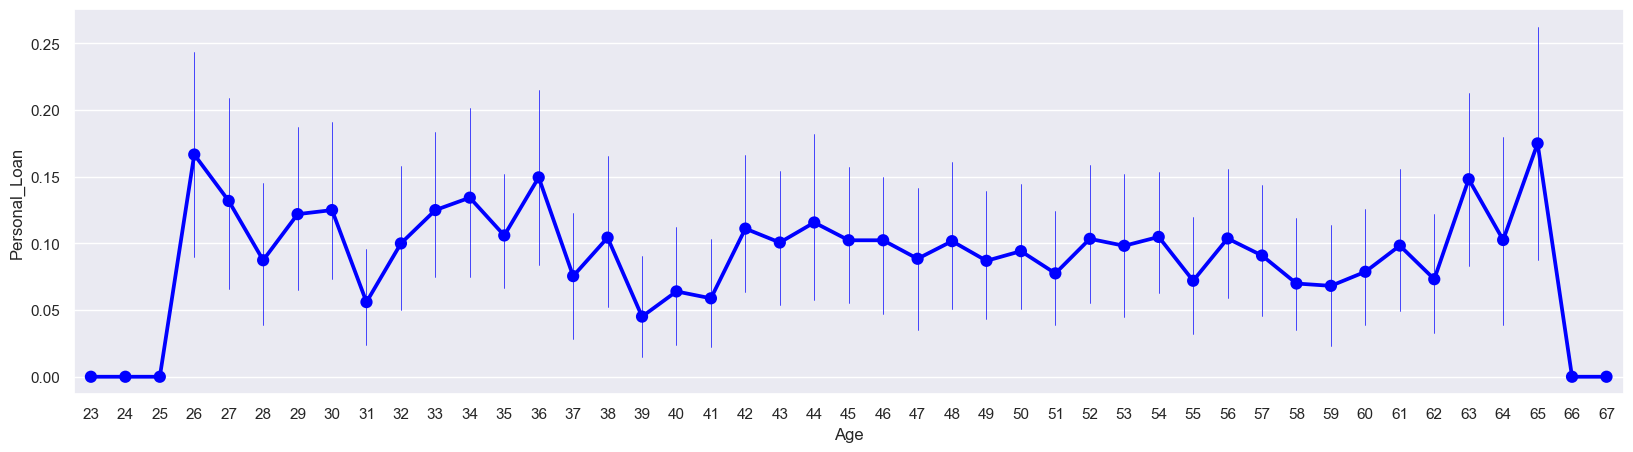

In [23]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Age", y="Personal_Loan", data=data, color="blue", errwidth=0.5)
plt.show()

Creating a barplot of Age vs Person_Loan

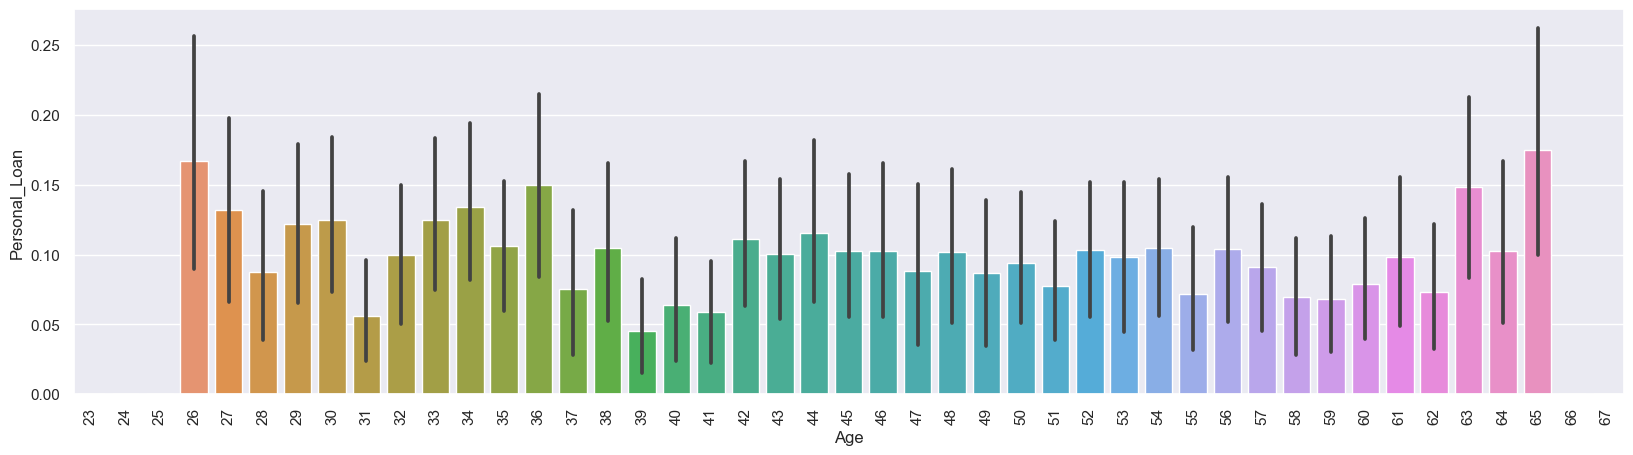

In [24]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Age", y="Personal_Loan", data=data)
plt.xticks(rotation=90)
plt.show()

* Looking at the data presented on whether a customer took a Personal_Loan or not versus the age of the customer, there is a set of peaks at 26 years old, 36 years old, 63 years old, and 66 years old. 

### Question 5: How does a customer's interest in purchasing a loan vary with their education?

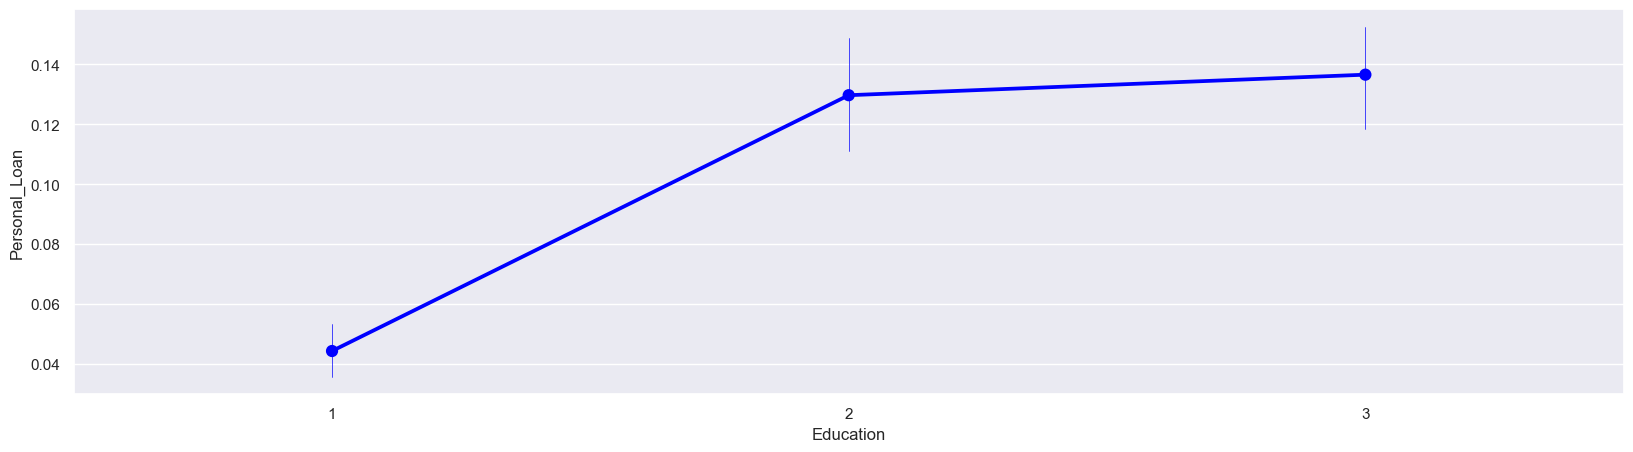

In [25]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="Education", y="Personal_Loan", data=data, color="blue", errwidth=0.5)
plt.show()

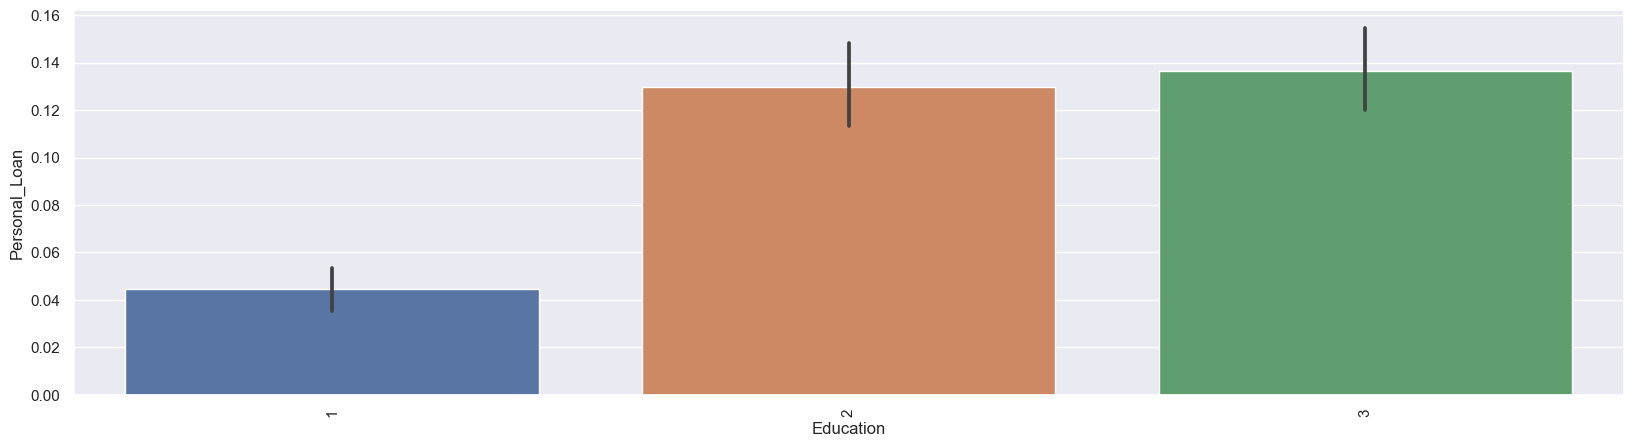

In [26]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Education", y="Personal_Loan", data=data)
plt.xticks(rotation=90)
plt.show()

* Per the graphs above, the data shows the more educated a customer is the more likely they are to take a loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [27]:
# Dropping ID column that was mentioned as redundant.
data.drop(["ID"], axis=1, inplace=True)

In [28]:
# Changing all numbers to the absolute value to get rid of the negative numbers in the experience column
data.iloc[:, 1] = data.iloc[:, 1].abs()

In [29]:
# Rerunning this code from earlier to verify there are no longer negative numbers in the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [46]:
search = SearchEngine()
zcode = data.ZIPCode
counties = []

def zipcodefunction(x):
    for i in x:
        zipcode = search.by_zipcode(i)
        county = zipcode.county
        counties.append(county)
    
zipcodefunction(zcode)

print(counties)

AttributeError: 'NoneType' object has no attribute 'county'

In [ ]:
#Adding a County column to the data and verification that the code works
data.insert(loc=4, column="County", value=counties, allow_duplicates=True)
data.sample(10, random_state=2)

## Model Building

### Model Evaluation Criterion

*


### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___